In [2]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Impact of COVID-19 on the Economy

## Retail Trade Sales in Canada

Using data from https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2010000801 I'll be looking at the impact of COVID-19 on retail trade

In [4]:
#Lets look at the metadata
retail_meta = pd.read_csv('/content/drive/My Drive/Colab Notebooks/retail_trade_sales_metadata.csv')
retail_meta.head()

Cube Title  ... Total number of dimensions
0  Retail trade sales by province and territory  ...                        3.0
1                                  Dimension ID  ...                        NaN
2                                             1  ...                        NaN
3                                             2  ...                        NaN
4                                             3  ...                        NaN

[5 rows x 10 columns]

In [5]:
#Read in the dataset
retail = pd.read_csv('/content/drive/My Drive/Colab Notebooks/retail_trade_sales.csv')
retail.head()

REF_DATE     GEO           DGUID  ... SYMBOL TERMINATED DECIMALS
0  1991-01  Canada  2016A000011124  ...    NaN        NaN        0
1  1991-01  Canada  2016A000011124  ...    NaN        NaN        0
2  1991-01  Canada  2016A000011124  ...    NaN        NaN        0
3  1991-01  Canada  2016A000011124  ...    NaN        NaN        0
4  1991-01  Canada  2016A000011124  ...    NaN        NaN        0

[5 rows x 16 columns]

In [7]:
#Lets look at the unique NAICS labels
retail['North American Industry Classification System (NAICS)'].unique()

array(['Retail trade [44-45]', 'Motor vehicle and parts dealers [441]',
       'New car dealers [44111]',
       'Furniture and home furnishings stores [442]',
       'Furniture stores [4421]', 'Home furnishings stores [4422]',
       'Electronics and appliance stores [443]',
       'Building material and garden equipment and supplies dealers [444]',
       'Food and beverage stores [445]',
       'Supermarkets and other grocery (except convenience) stores\xa0 [44511]',
       'Beer, wine and liquor stores [4453]',
       'Health and personal care stores [446]', 'Gasoline stations [447]',
       'Clothing and clothing accessories stores [448]',
       'Sporting goods, hobby, book and music stores [451]',
       'General merchandise stores [452]', 'Department stores [4521]',
       'Other general merchandise stores [4529]',
       'Miscellaneous store retailers [453]', 'Automobile dealers [4411]',
       'Used car dealers [44112]', 'Other motor vehicle dealers [4412]',
       'Automotiv

In [35]:
#Drop uneccessary columns
#UOM has only dollars, so unecessary
#SCALAR_FACTOR is only thousands
retail = retail.loc[:,['REF_DATE','GEO','North American Industry Classification System (NAICS)','Adjustments','VALUE']]
retail.REF_DATE = pd.to_datetime(retail.REF_DATE)
retail.head()

REF_DATE     GEO  ...          Adjustments       VALUE
0 1991-01-01  Canada  ...           Unadjusted  12588862.0
1 1991-01-01  Canada  ...  Seasonally adjusted  15026890.0
2 1991-01-01  Canada  ...           Unadjusted   2484133.0
3 1991-01-01  Canada  ...  Seasonally adjusted   3124582.0
4 1991-01-01  Canada  ...           Unadjusted   2085763.0

[5 rows x 5 columns]

In [38]:
#Let's look at how retail trade was affected in Canada since 2007
plot_df = retail.loc[(retail.REF_DATE >= '2007')&(retail.GEO == 'Canada') & (retail['North American Industry Classification System (NAICS)'] == 'Retail trade [44-45]') & (retail.Adjustments == 'Seasonally adjusted')]
plot_df.index = plot_df.REF_DATE
plot_df = plot_df.loc[:,['VALUE']]
plot_df.head()

VALUE
REF_DATE              
2007-01-01  33221023.0
2007-02-01  33466188.0
2007-03-01  33910296.0
2007-04-01  34385868.0
2007-05-01  34789277.0

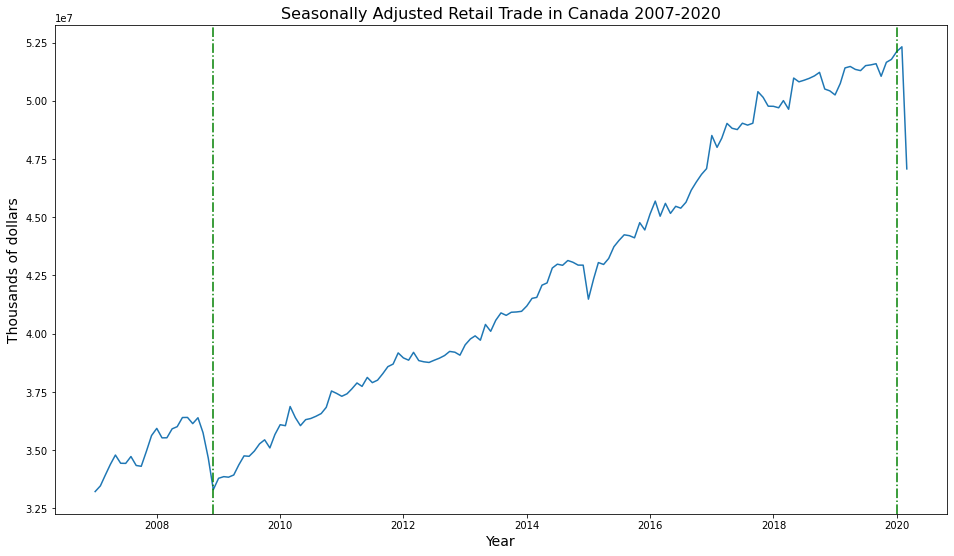

In [58]:
fig, ax = plt.subplots()
fig.set_size_inches(16,9)
fig.set_facecolor('w')

ax.plot(plot_df)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Thousands of dollars', fontsize=14)
ax.axvline(np.datetime64('2008-11-29'), color='g', linestyle='-.')
ax.axvline(np.datetime64('2020-01-01'), color='g', linestyle='-.')
plt.title('Seasonally Adjusted Retail Trade in Canada 2007-2020', fontsize=16)
plt.show()

The first dotted green line markes the 2008 market crash. The second line marks the confirmation date of COVID-19

In [67]:
#Lets look at just 2019-2020, and across each province
plot_df = retail.loc[(retail.REF_DATE >= '2019-09') & (retail['North American Industry Classification System (NAICS)'] == 'Retail trade [44-45]') & (retail.Adjustments == 'Seasonally adjusted')]
plot_df.index = plot_df.REF_DATE
plot_df = plot_df.loc[:,['GEO','VALUE']]
plot_df.head()

GEO       VALUE
REF_DATE                                         
2019-09-01                     Canada  51589425.0
2019-09-01  Newfoundland and Labrador    759837.0
2019-09-01       Prince Edward Island    211836.0
2019-09-01                Nova Scotia   1376269.0
2019-09-01              New Brunswick   1098060.0

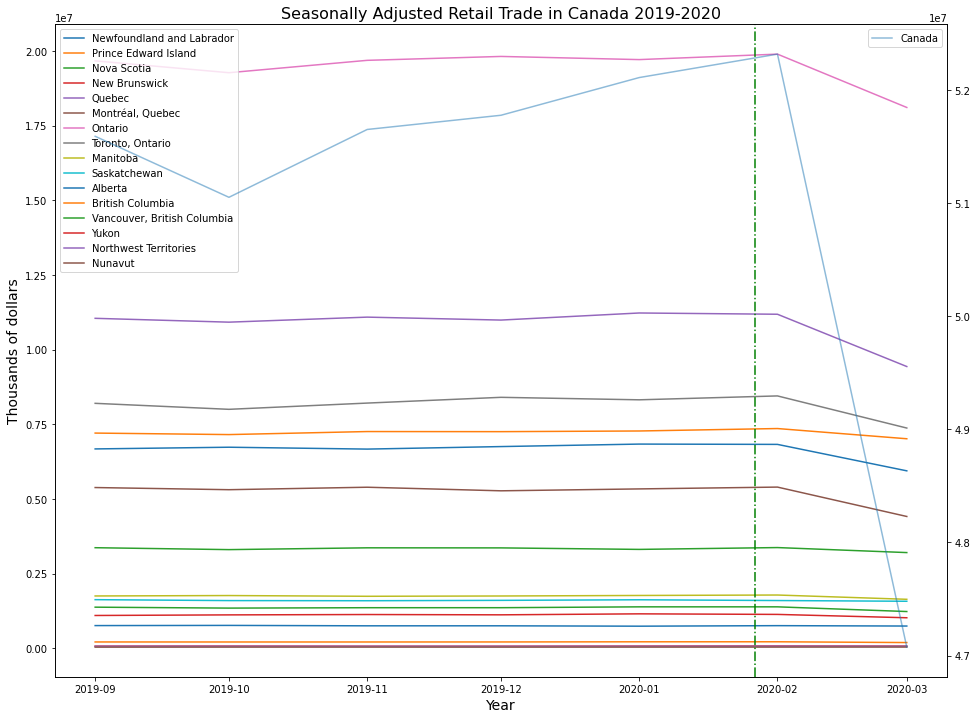

In [80]:
fig, ax = plt.subplots()
fig.set_size_inches(16,12)
fig.set_facecolor('w')

for province in plot_df.GEO.unique():
  if province != 'Canada':
    ax.plot(plot_df[plot_df.GEO==province].loc[:,['VALUE']], label=province)
plt.legend(loc='upper left')
ax.axvline(np.datetime64('2020-01-27'), color='g', linestyle='-.')
#Plot canada on seperate scale
ax2 = ax.twinx()
ax2.plot(plot_df[plot_df.GEO=='Canada'].loc[:,['VALUE']], label='Canada', alpha=0.5)
plt.legend(loc='upper right')

ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Thousands of dollars', fontsize=14)
plt.title('Seasonally Adjusted Retail Trade in Canada 2019-2020', fontsize=16)
plt.show()

The green dotted line marks the first confirmed case of COVID-19 in Canada, according to https://globalnews.ca/news/6627505/coronavirus-covid-canada-timeline/

Now, I'll look at the drop from 2020-01 to 2020-03 for each NAIC across canada

In [93]:
plot_df = retail.loc[(retail.REF_DATE >= '2020') & (retail.GEO == 'Canada') & (retail.Adjustments == 'Seasonally adjusted')]
plot_df.index = plot_df['North American Industry Classification System (NAICS)']
plot_df = plot_df.loc[:,['VALUE', 'REF_DATE']]
plot_df.head()

VALUE   REF_DATE
North American Industry Classification System (...                       
Retail trade [44-45]                                52108439.0 2020-01-01
Motor vehicle and parts dealers [441]               14134123.0 2020-01-01
Automobile dealers [4411]                           12409071.0 2020-01-01
New car dealers [44111]                             11383128.0 2020-01-01
Used car dealers [44112]                             1025943.0 2020-01-01

In [96]:
#Create new feature of difference
plot_df['Difference'] = plot_df[plot_df.REF_DATE == np.datetime64('2020-03-01')].loc[:,['VALUE']] - plot_df[plot_df.REF_DATE == np.datetime64('2020-01-01')].loc[:,['VALUE']]
plot_df = plot_df.loc[:,['Difference']]
plot_df.head()

Difference
North American Industry Classification System (...            
Retail trade [44-45]                                -5034386.0
Motor vehicle and parts dealers [441]               -4920064.0
Automobile dealers [4411]                           -4668408.0
New car dealers [44111]                             -4325376.0
Used car dealers [44112]                             -343031.0

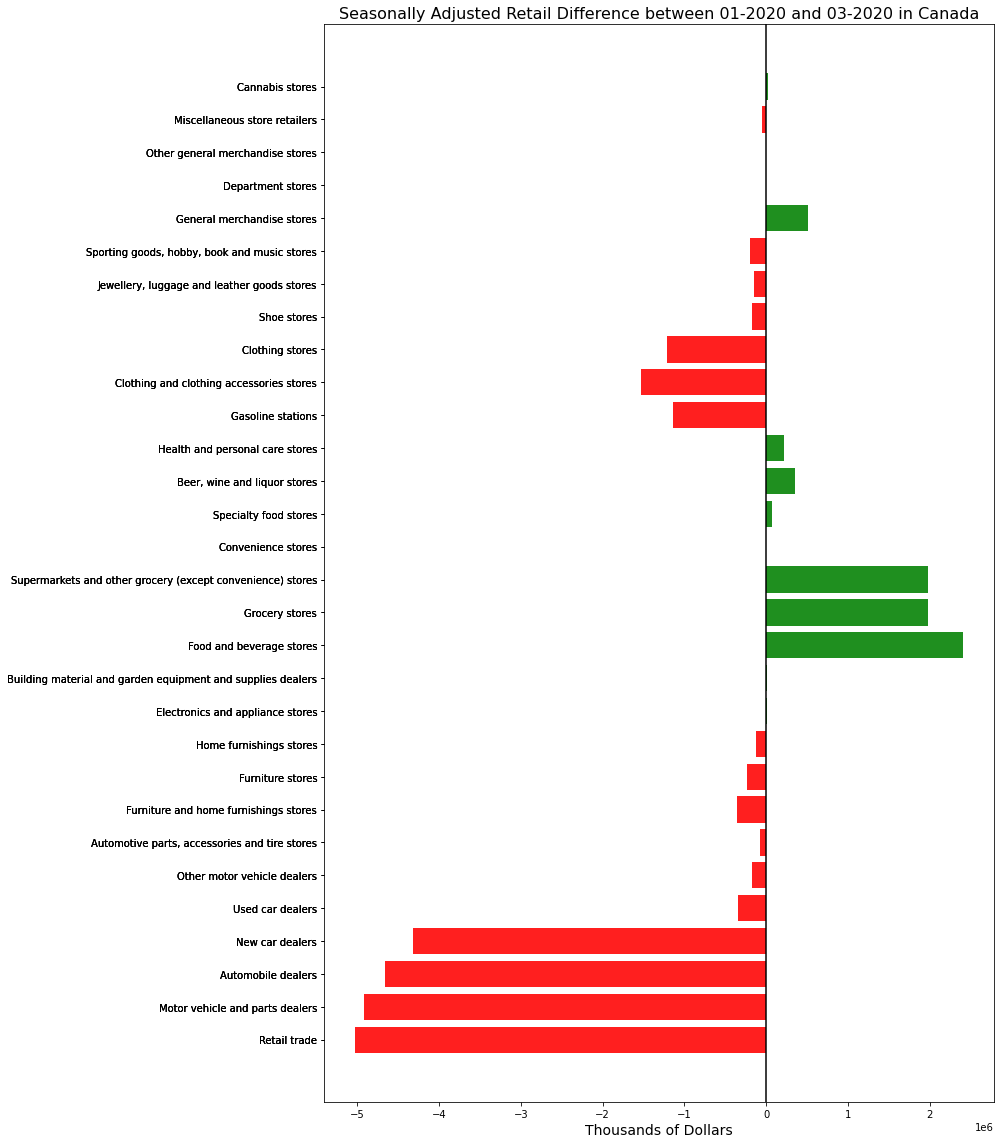

In [155]:
fig, ax = plt.subplots()
fig.set_size_inches(14,16)
fig.set_facecolor('w')

#Color Differences >= 0 as green and < 0 as red
colors = np.asarray(['r']*len(plot_df.Difference.values))
colors[plot_df.Difference>=0] = 'g'

#Remove [..] from end of NAICs labels
labels = [label.split('[')[0].strip() for label in plot_df.index.values]

ax.barh(plot_df.index, plot_df.Difference, color=colors, alpha=0.5, tick_label = labels)
ax.axvline(0, color='k')

ax.set_xlabel('Thousands of Dollars', fontsize=14)
plt.title('Seasonally Adjusted Retail Difference between 01-2020 and 03-2020 in Canada', fontsize=16)
plt.tight_layout()
plt.savefig('retail_difference_canada.png')
plt.show()